In [63]:
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

### 6.20)

In [59]:
def L2_SVD(X, y, alpha):
    """
    Solve for the parameters beta such that 
    argmin_beta ||X @ beta - y||_2
    
    Do this using the SVD decomposition to solve: X @ beta = y
    
    So if X = U @ S @ V.T, then then the above system is equivalent to solving:
        beta_hat = V @ inv(S) @ U.T @ y
    
    @params:
        X   (np.array): [n, d]
        y   (np.array): [n]
    """
    
    # compute the SVD of X
    U, s, V_h = np.linalg.svd(X, full_matrices=False)
    inv = np.diag(1 / (s**2 + alpha))
    D = np.diag(s)
    
    # return solution for Ridge (L2) regression
    return V_h.T @ (inv @ (D @ (U.T @ y)))

### 6.21) Ridge (L2) Comparison

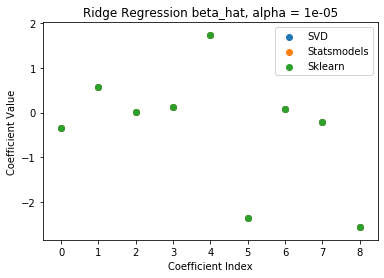

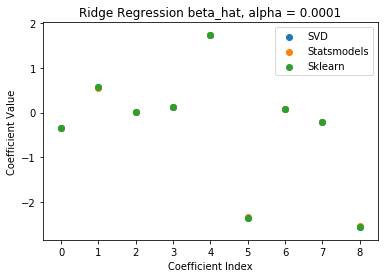

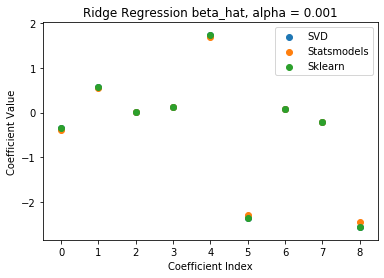

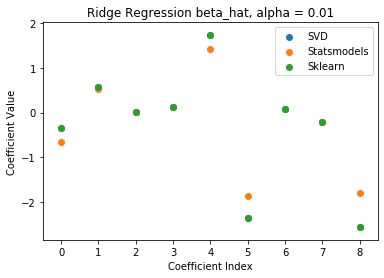

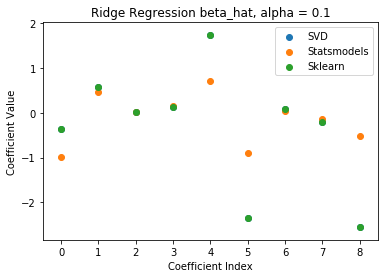

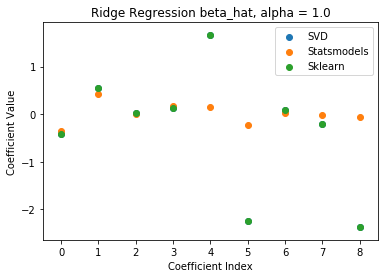

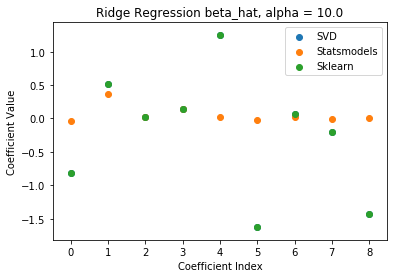

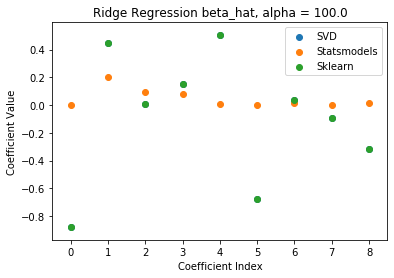

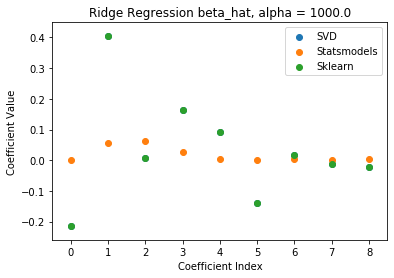

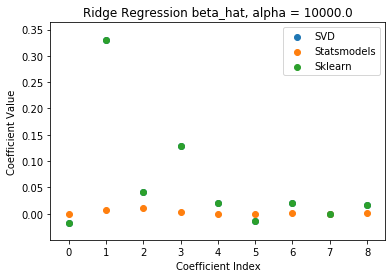

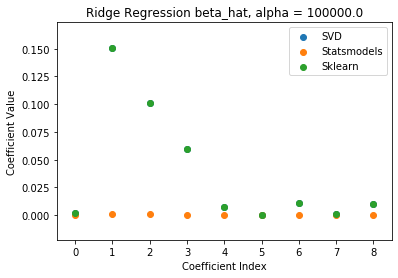

In [60]:
# read/prep wages dataset
df = pd.read_csv('wages.csv')
df['female*married'] = df.female * df.married
df['y_int'] = 1

# get predictor features
features = ['female', 'educ', 'exper', 'tenure', 'married', 'female*married', 'numdep', 'nonwhite', 'y_int']
X = df[features]
y = df['wage']

'''For each alpha in the following range, run ridge (L2) regression on the selected featuers
and compare the coefficients'''
alphas = 10.**np.arange(-5, 5 + 1)
for alpha in alphas:
    
    # (i) svd
    svd_betas = L2_SVD(X, y, alpha)
    
    # (ii) statsmodels
    sm_betas = sm.regression.linear_model.OLS(y, X).fit_regularized(L1_wt=0, alpha=alpha).params
    
    # (iii) sklearn
    sk_betas = linear_model.Ridge(
        alpha, 
        fit_intercept=False, # we already added one
    ).fit(X, y).coef_
    
    # plot the coefficients to compare
    domain = np.arange(len(svd_betas))
    plt.scatter(domain, svd_betas, label='SVD')
    plt.scatter(domain, sm_betas, label='Statsmodels')
    plt.scatter(domain, sk_betas, label="Sklearn")
    plt.legend()
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')
    plt.title(f'Ridge Regression beta_hat, alpha = {alpha}')
    plt.show()

### 6.22) LASSO (L1) Comparison

In [61]:
# Optimal feature set by AIC
features = ['educ', 'exper', 'tenure', 'married', 'married*female']
X = X[features + ['y_int']]

alphas = 10.**np.arange(-5, 5 + 1)
for alpha in alphas:
    
    # (i) statsmodels
    sm_betas = sm.regression.linear_model.OLS(y, X).fit_regularized(L1_wt=1, alpha=alpha).params
    
    # (ii) sklearn
    sk_betas = linear_model.Lasso(
        alpha, 
        fit_intercept=False, # we already added one
    ).fit(X, y).coef_
    
    # plot the coefficients to compare
    domain = np.arange(len(svd_betas))
    plt.scatter(domain, sm_betas, label='Statsmodels')
    plt.scatter(domain, sk_betas, label="Sklearn")
    plt.legend()
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')
    plt.title(f'LASSO Regression beta_hat, = {alpha}')
    plt.show()

KeyError: "['married*female'] not in index"

### 6.23)

In [74]:
# get predictor features
features = ['female', 'educ', 'exper', 'tenure', 'married', 'female*married', 'numdep', 'nonwhite']
less = ['educ', 'tenure', 'married', 'female*married']
X = df[features]
y = df['wage']

# fit OLS 
OLS_good = linear_model.LinearRegression().fit(X, y)
print(f'full feature set cross validation OLS: {cross_val_score(OLS_good, X, y, cv=7).mean()}')

OLS_less = linear_model.LinearRegression().fit(X[less], y)
print(f'less feature set cross validation OLS: {cross_val_score(OLS_less, X, y, cv=7).mean()}')

# do 7-fold cross validation for each value of alpha
alphas = 10.**np.arange(-5, 5 + 1)
for alpha in alphas:
    
    # cv Lasso
    Lasso = linear_model.Lasso(alpha=alpha).fit(X, y)
    print(f'alpha = {alpha}\t Lasso 7-CV: {cross_val_score(Lasso, X, y, cv=7).mean()}')

alphas = 10.**np.arange(-5, 5 + 1)
for alpha in alphas:

    Ridge = linear_model.Ridge(alpha=alpha).fit(X, y)
    print(f'alpha = {alpha}\t Ridge 7-CV: {cross_val_score(Ridge, X, y, cv=7).mean()}')
    
    


full feature set cross validation OLS: 0.34555318816486824
less feature set cross validation OLS: 0.34555318816486824
alpha = 1e-05	 Lasso 7-CV: 0.3455542285146271
alpha = 0.0001	 Lasso 7-CV: 0.3455635511259626
alpha = 0.001	 Lasso 7-CV: 0.3456537479432414
alpha = 0.01	 Lasso 7-CV: 0.34632375845219227
alpha = 0.1	 Lasso 7-CV: 0.33249597671159126
alpha = 1.0	 Lasso 7-CV: 0.26184918223641224
alpha = 10.0	 Lasso 7-CV: -0.03370662447048863
alpha = 100.0	 Lasso 7-CV: -0.03370662447048863
alpha = 1000.0	 Lasso 7-CV: -0.03370662447048863
alpha = 10000.0	 Lasso 7-CV: -0.03370662447048863
alpha = 100000.0	 Lasso 7-CV: -0.03370662447048863
alpha = 1e-05	 Ridge 7-CV: 0.34555319365442216
alpha = 0.0001	 Ridge 7-CV: 0.3455532430594162
alpha = 0.001	 Ridge 7-CV: 0.3455537370107819
alpha = 0.01	 Ridge 7-CV: 0.34555866667823815
alpha = 0.1	 Ridge 7-CV: 0.34560699001806455
alpha = 1.0	 Ridge 7-CV: 0.34600314314457187
alpha = 10.0	 Ridge 7-CV: 0.3462203750254646
alpha = 100.0	 Ridge 7-CV: 0.331856513724

### 6.24)